In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [2]:
dataset = pd.read_csv('Tweets.csv')
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,568563462995099649,negative,0.6702,Late Flight,0.6702,United,NaN,cptrice,NaN,0,@united an update on flight 5979 would be great!,"[39.99838284, -82.88068344]",2015-02-19 16:11:07 -0800,Chicago,NaN
1,569659620517662721,negative,1.0000,Late Flight,0.3726,American,NaN,debby_hester,NaN,0,@AmericanAir my husband and 5 year old son stu...,NaN,2015-02-22 16:46:51 -0800,Lake Norman NC,Eastern Time (US & Canada)
2,569747411779735552,negative,1.0000,Cancelled Flight,1.0000,American,NaN,jzinchuk,NaN,0,@AmericanAir you Cancelled Flightled my flight...,NaN,2015-02-22 22:35:43 -0800,"Seattle, WA",Pacific Time (US & Canada)
3,570032636657311744,neutral,0.7219,NaN,0.0000,American,NaN,shaun_souza,NaN,0,@AmericanAir the status on my itinerary says o...,NaN,2015-02-23 17:29:05 -0800,NaN,NaN
4,569606089316167680,positive,1.0000,NaN,NaN,Southwest,NaN,NmJean05,NaN,0,@SouthwestAir ohk. Thank You!!! B/C of the ine...,NaN,2015-02-22 13:14:09 -0800,"Newark, NJ",Eastern Time (US & Canada)


In [3]:
dataset.shape

(14640, 15)

In [4]:
dataset = dataset[['airline_sentiment','text']]
dataset.head()

,airline_sentiment,text
0,negative,@united an update on flight 5979 would be great!
1,negative,@AmericanAir my husband and 5 year old son stu...
2,negative,@AmericanAir you Cancelled Flightled my flight...
3,neutral,@AmericanAir the status on my itinerary says o...
4,positive,@SouthwestAir ohk. Thank You!!! B/C of the ine...


<AxesSubplot:ylabel='Frequency'>

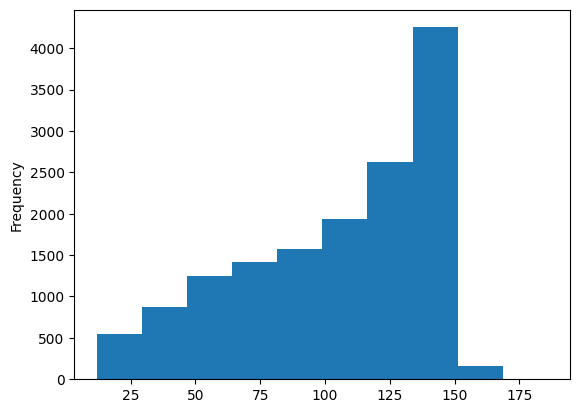

In [5]:
%matplotlib inline
dataset['text'].str.len().plot.hist()

In [6]:
dataset['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

<AxesSubplot:>

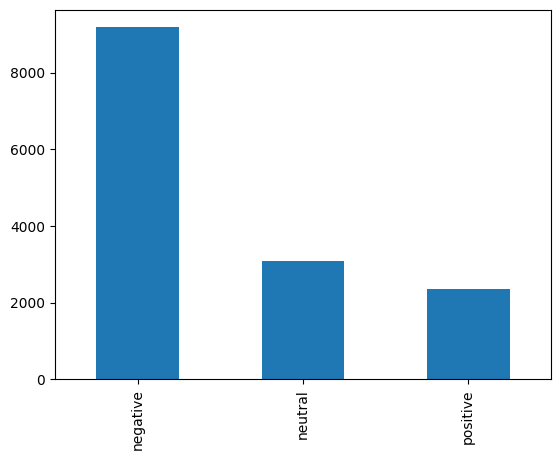

In [7]:
dataset['airline_sentiment'].value_counts().plot.bar()

In [8]:
dataset['text'].apply(lambda x: x.lower())
dataset['text'] = dataset['text'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]',"",x))
dataset['text'].head()

0       united an update on flight 5979 would be great
1    AmericanAir my husband and 5 year old son stuc...
2    AmericanAir you Cancelled Flightled my flight ...
3    AmericanAir the status on my itinerary says on...
4    SouthwestAir ohk Thank You BC of the inexpensi...
Name: text, dtype: object

In [9]:
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(dataset['text'].values)

X = tokenizer.texts_to_sequences(dataset['text'].values)
X = pad_sequences(X)
X[:7]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    5,   40,  316,    9,    8,   76,   32,  114],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   13,   11,
         861,   10,  231,  367,  429, 1085,  232,  862,   15,  540,   36,
           1,  449,  176,  775, 4598,  100,  183,   23,  211,    2,    8],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   13,    6,
          37,   83,   11,    8,  131,  325,  541,   19,   10,    3,  145,
           1,   46,   19,  227,    4,  146,    8,   57,   34,    3,   84],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,   13,    2,  324,
           9,   11, 1025,  254,    9,  581,   15, 1427,  240,   26,  563],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,   

In [10]:
X.shape

(14640, 33)

In [11]:
model = Sequential()
model.add(Embedding(5000, 256, input_length = X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout = 0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout = 0.3, recurrent_dropout =0.2))
model.add(Dense(3, activation = 'softmax'))

2022-08-31 23:36:07.385816: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-31 23:36:07.409233: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-31 23:36:07.409285: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-31 23:36:07.410831: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

2022-08-31 23:36:07.412695: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-31 23:36:07.412749: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-31 23:36:07.412779: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-31 23:36:08.000233: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-31 23:36:08.000640: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not op

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 33, 256)           1280000   
                                                                 
 dropout (Dropout)           (None, 33, 256)           0         
                                                                 
 lstm (LSTM)                 (None, 33, 256)           525312    
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dense (Dense)               (None, 3)                 771       
                                                                 
Total params: 2,331,395
Trainable params: 2,331,395
Non-trainable params: 0
_________________________________________________________________


In [13]:
y = pd.get_dummies(dataset['airline_sentiment']).values
[print(dataset['airline_sentiment'][i], y[i]) for i in range(0,7)]

negative [1 0 0]
negative [1 0 0]
negative [1 0 0]
neutral [0 1 0]
positive [0 0 1]
negative [1 0 0]
positive [0 0 1]


[None, None, None, None, None, None, None]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [15]:
batch_size = 32
epochs = 10
model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, verbose=2)

Epoch 1/10
366/366 - 69s - loss: 0.6502 - accuracy: 0.7298 - 69s/epoch - 188ms/step
Epoch 2/10
366/366 - 68s - loss: 0.4293 - accuracy: 0.8339 - 68s/epoch - 186ms/step
Epoch 3/10
366/366 - 72s - loss: 0.3445 - accuracy: 0.8675 - 72s/epoch - 196ms/step
Epoch 4/10
366/366 - 73s - loss: 0.2792 - accuracy: 0.8960 - 73s/epoch - 198ms/step
Epoch 5/10
366/366 - 66s - loss: 0.2282 - accuracy: 0.9150 - 66s/epoch - 179ms/step
Epoch 6/10
366/366 - 66s - loss: 0.1893 - accuracy: 0.9306 - 66s/epoch - 181ms/step
Epoch 7/10
366/366 - 65s - loss: 0.1675 - accuracy: 0.9393 - 65s/epoch - 177ms/step
Epoch 8/10
366/366 - 65s - loss: 0.1363 - accuracy: 0.9506 - 65s/epoch - 179ms/step
Epoch 9/10
366/366 - 70s - loss: 0.1240 - accuracy: 0.9555 - 70s/epoch - 190ms/step
Epoch 10/10
366/366 - 66s - loss: 0.1001 - accuracy: 0.9633 - 66s/epoch - 179ms/step


In [16]:
model.save(r'mnt/c/Users/kozan/Desktop/Sen_Des_Proj/TF_Deep_Learing_book/lstm_stock_udemy/Sentiment_Model.h5')

In [17]:
prediction = model.predict(X_test)

[print(dataset['text'][i], prediction[i], y_test[i]) for i in range(0,7)]

92/92 [==============================] - 3s 33ms/step
united an update on flight 5979 would be great [9.9963248e-01 1.7096517e-04 1.9649972e-04] [1 0 0]
AmericanAir my husband and 5 year old son stuck overnight in DC thanks to 7 crew members arguing over who was boarding the flight [0.03975666 0.93036807 0.02987523] [0 1 0]
AmericanAir you Cancelled Flightled my flight tomorrow without telling me and I want to rebookplease help me book a new flight What  can I call [0.00285729 0.03178174 0.96536094] [0 0 1]
AmericanAir the status on my itinerary says on request in red Whats that mean [2.2347182e-02 9.7701615e-01 6.3658063e-04] [1 0 0]
SouthwestAir ohk Thank You BC of the inexpensive airfares that Southwest has I can now travel around [1.0638626e-03 9.9892324e-01 1.2860667e-05] [1 0 0]
AmericanAir  terrible response How about someone picking up the phone and calling meIt is now 49 Hours with no luggage [2.0311762e-02 9.7949672e-01 1.9146876e-04] [1 0 0]
united big up the pilot of 644 fo

[None, None, None, None, None, None, None]